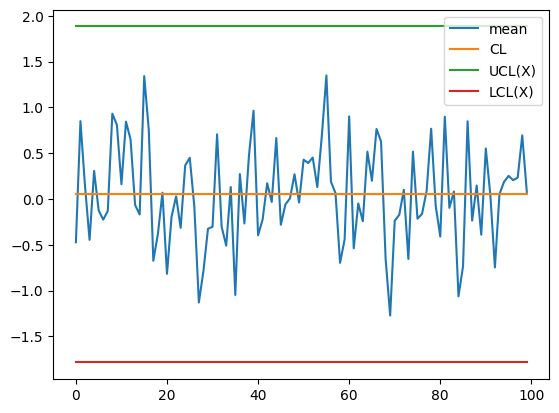

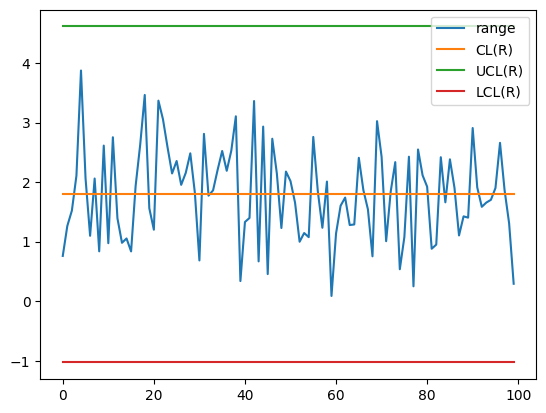

In [76]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as integrate
from scipy.stats import studentized_range


def d2(n: int) -> float:
    return integrate.quad(
        lambda x: 1 - studentized_range.cdf(x, n, np.inf), 0, np.inf
    )[0]


def d3(n: int) -> float:
    quad_func_d3 = (
        integrate.quad(
            lambda x: x * (1 - studentized_range.cdf(x, n, np.inf)), 0, np.inf
        )[0]
        * 2
    )
    d2_ = d2(n) ** 2
    return (quad_func_d3 - d2_) ** 0.5


def A2(n: int) -> float:
    return 3 / (np.sqrt(n) * d2(n))


def D3(n: int) -> float:
    return 1 - 3 * (d3(n) / d2(n))


def D4(n: int) -> float:
    return 1 + 3 * (d3(n) / d2(n))


# test
assert d2(2) == 1.128379167095512
assert d3(3) == 0.8883680040452019
assert A2(2) == 1.8799712059732514
assert D3(3) == -0.5745912897911656
assert D4(3) == 2.5745912897911656


goods_per_lot = 1000
total_lots = 100

# for reproducibility
np.random.seed(0)
goods = np.random.normal(0, 1, (total_lots, goods_per_lot))
assert goods.shape == (total_lots, goods_per_lot)

# sampling from goods
samples_per_lot = 3
# shape == (lot, samples_per_lot)
np.random.seed(0)
samples = goods[:, np.random.randint(0, goods_per_lot, samples_per_lot)]
assert samples.shape == (total_lots, samples_per_lot)

# mean of samples
# shape == (lot, )
X_bar = samples.mean(axis=1)
assert X_bar.shape == (total_lots,)
X_bar_bar = X_bar.mean()

# range
R = samples.max(axis=1) - samples.min(axis=1)
R_bar = R.mean()
CL = X_bar_bar

X_UCL = CL + A2(samples_per_lot) * R_bar
X_LCL = CL - A2(samples_per_lot) * R_bar
R_CL = R_bar
R_UCL = D4(samples_per_lot) * R_bar
R_LCL = D3(samples_per_lot) * R_bar

# schewhart control chart constant
# X-R control chart
# plot x bar
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_bar, label="mean")
ax.plot(CL.repeat(total_lots), label="CL")
ax.plot(X_UCL.repeat(total_lots), label="UCL(X)")
ax.plot(X_LCL.repeat(total_lots), label="LCL(X)")
ax.legend()
plt.show()

# plot R range
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R, label="range")
ax.plot(R_CL.repeat(total_lots), label="CL(R)")
ax.plot(R_UCL.repeat(total_lots), label="UCL(R)")
ax.plot(R_LCL.repeat(total_lots), label="LCL(R)")
ax.legend()
plt.show()